# Set up environment

In [1]:
!pip install pyproj

     |████████████████████████████████| 6.6MB 7.3MB/s 


In [2]:
import pandas as pd
from google.colab import drive
import os
import seaborn as sns
import numpy as np
import shapely
import math

In [3]:
drive.mount('/content/gdrive',force_remount=True)
os.chdir("/content/gdrive/My Drive/big data and city 3/")

Mounted at /content/gdrive


In [4]:
%%time 
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Ign:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804

In [5]:
import os
import geopandas as gpd

# Get 500 cities boundary 

In [6]:
area_boundary = gpd.read_file("500Cities_Tracts_Clip.geojson")
area_boundary.head()


,place2010,tract2010,ST,PlaceName,plctract10,PlcTrPop10,geometry
0,0107000,01073000100,01,Birmingham,0107000-01073000100,3042,"POLYGON ((-9653001.056 3974630.899, -9652982.0..."
1,0107000,01073000300,01,Birmingham,0107000-01073000300,2735,"POLYGON ((-9657462.853 3968794.996, -9657470.2..."
2,0107000,01073000400,01,Birmingham,0107000-01073000400,3338,"POLYGON ((-9657275.613 3972217.160, -9657275.3..."
3,0107000,01073000500,01,Birmingham,0107000-01073000500,2864,"POLYGON ((-9660666.407 3968887.964, -9660631.7..."
4,0107000,01073000700,01,Birmingham,0107000-01073000700,2577,"POLYGON ((-9661391.097 3968591.429, -9661398.2..."


In [56]:
#42,36,34,12,06
CA = area_boundary[area_boundary['ST'] == '06']

In [57]:
CA

,place2010,tract2010,ST,PlaceName,plctract10,PlcTrPop10,geometry,area
1584,0600562,06001427100,06,Alameda,0600562-06001427100,3646,"POLYGON ((-13606067.562 4544993.549, -13606068...",1.645791e+06
1585,0600562,06001427200,06,Alameda,0600562-06001427200,4107,"MULTIPOLYGON (((-13608946.922 4548141.098, -13...",2.132769e+06
1586,0600562,06001427300,06,Alameda,0600562-06001427300,4896,"POLYGON ((-13608990.630 4548140.130, -13608991...",3.131895e+06
1587,0600562,06001427600,06,Alameda,0600562-06001427600,4722,"POLYGON ((-13611773.433 4548349.830, -13611773...",9.345803e+05
1588,0600562,06001427700,06,Alameda,0600562-06001427700,4866,"MULTIPOLYGON (((-13612232.849 4546472.684, -13...",1.623464e+06
...,...,...,...,...,...,...,...,...
9823,0685292,06037501001,06,Whittier,0685292-06037501001,0,"MULTIPOLYGON (((-13143008.277 4027589.161, -13...",5.037298e+04
9824,0685292,06037502700,06,Whittier,0685292-06037502700,0,"POLYGON ((-13141899.980 4023628.602, -13141914...",1.079206e+03
9825,0685292,06037502902,06,Whittier,0685292-06037502902,0,"POLYGON ((-13140781.220 4022808.044, -13140747...",2.884862e+05
9826,0685292,06037503501,06,Whittier,0685292-06037503501,0,"POLYGON ((-13135791.879 4020369.261, -13135792...",8.642618e+04


In [49]:
!pip install contextily==1.0rc2
import contextily as ctx

In [44]:
ax = CA.plot(figsize = (30, 30))
ctx.add_basemap(ax, url=ctx.providers.OpenStreetMap.Mapnik)

Output hidden; open in https://colab.research.google.com to view.

In [7]:
area_boundary['area'] = np.nan
for i in range(len(area_boundary)):
  area_boundary.loc[i,'area'] = area_boundary.loc[i,'geometry'].area


In [ ]:
area_boundary.head()


,place2010,tract2010,ST,PlaceName,plctract10,PlcTrPop10,geometry,area
0,0107000,01073000100,01,Birmingham,0107000-01073000100,3042,"POLYGON ((-9653001.056 3974630.899, -9652982.0...",1.102526e+07
1,0107000,01073000300,01,Birmingham,0107000-01073000300,2735,"POLYGON ((-9657462.853 3968794.996, -9657470.2...",3.020969e+06
2,0107000,01073000400,01,Birmingham,0107000-01073000400,3338,"POLYGON ((-9657275.613 3972217.160, -9657275.3...",1.155412e+07
3,0107000,01073000500,01,Birmingham,0107000-01073000500,2864,"POLYGON ((-9660666.407 3968887.964, -9660631.7...",6.955719e+06
4,0107000,01073000700,01,Birmingham,0107000-01073000700,2577,"POLYGON ((-9661391.097 3968591.429, -9661398.2...",5.082370e+06


# Get Health Data from CDC

In [ ]:
health_data = pd.read_csv("500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2018_release.csv")

In [ ]:
health_data.head()

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,BINGE_CrudePrev,BINGE_Crude95CI,BPHIGH_CrudePrev,BPHIGH_Crude95CI,BPMED_CrudePrev,BPMED_Crude95CI,CANCER_CrudePrev,CANCER_Crude95CI,CASTHMA_CrudePrev,CASTHMA_Crude95CI,CHD_CrudePrev,CHD_Crude95CI,CHECKUP_CrudePrev,CHECKUP_Crude95CI,CHOLSCREEN_CrudePrev,CHOLSCREEN_Crude95CI,COLON_SCREEN_CrudePrev,COLON_SCREEN_Crude95CI,COPD_CrudePrev,COPD_Crude95CI,COREM_CrudePrev,COREM_Crude95CI,COREW_CrudePrev,COREW_Crude95CI,CSMOKING_CrudePrev,CSMOKING_Crude95CI,DENTAL_CrudePrev,DENTAL_Crude95CI,DIABETES_CrudePrev,DIABETES_Crude95CI,HIGHCHOL_CrudePrev,HIGHCHOL_Crude95CI,KIDNEY_CrudePrev,KIDNEY_Crude95CI,LPA_CrudePrev,LPA_Crude95CI,MAMMOUSE_CrudePrev,MAMMOUSE_Crude95CI,MHLTH_CrudePrev,MHLTH_Crude95CI,OBESITY_CrudePrev,OBESITY_Crude95CI,PAPTEST_CrudePrev,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
0,CA,Los Angeles,644000,6037206032,0644000-06037206032,5275,28.0,"(22.7, 33.2)",19.9,"(18.8, 20.9)",13.0,"(12.3, 13.7)",31.7,"(30.6, 32.9)",70.0,"(68.6, 71.4)",4.5,"( 4.2, 4.7)",8.5,"( 7.7, 9.3)",6.9,"( 6.2, 7.6)",63.8,"(62.5, 65.1)",66.0,"(63.0, 69.0)",48.6,"(44.5, 53.0)",6.5,"( 5.6, 7.3)",18.2,"(14.5, 22.6)",22.1,"(18.4, 26.5)",15.6,"(12.8, 18.1)",43.6,"(38.7, 49.0)",15.5,"(14.4, 16.4)",38.3,"(36.8, 39.9)",4.1,"( 3.8, 4.4)",33.3,"(29.7, 36.5)",77.6,"(74.5, 80.5)",15.0,"(13.1, 16.7)",29.5,"(28.1, 30.8)",83.7,"(81.5, 86.0)",17.3,"(15.3, 19.2)",38.9,"(37.2, 40.4)",4.0,"( 3.5, 4.5)",18.8,"(12.6, 25.6)",POINT (-118.224698433 34.0470512474)
1,CA,Pasadena,656000,6037462001,0656000-06037462001,3974,23.3,"(19.2, 27.8)",16.7,"(16.0, 17.5)",16.3,"(15.6, 16.9)",27.1,"(26.1, 28.0)",63.7,"(62.4, 65.0)",3.6,"( 3.4, 3.7)",9.4,"( 8.8, 10.1)",4.8,"( 4.5, 5.2)",62.2,"(61.0, 63.3)",65.7,"(62.8, 68.4)",52.5,"(49.0, 56.0)",6.0,"( 5.3, 6.6)",19.4,"(16.7, 22.9)",25.7,"(22.2, 29.5)",17.8,"(15.6, 20.0)",47.6,"(43.4, 51.9)",11.6,"(10.9, 12.2)",31.8,"(30.6, 33.1)",3.2,"( 3.0, 3.4)",27.0,"(24.4, 29.6)",80.2,"(77.4, 82.7)",15.7,"(14.2, 17.3)",32.0,"(30.8, 33.1)",85.8,"(84.1, 87.5)",15.3,"(13.9, 16.8)",40.2,"(38.8, 41.5)",3.2,"( 2.9, 3.5)",18.1,"(13.7, 22.8)",POINT (-118.143832177 34.1633689905)
2,CA,Fullerton,628000,6059011504,0628000-06059011504,5473,11.7,"( 9.6, 14.5)",8.3,"( 7.9, 8.7)",18.6,"(17.8, 19.5)",13.6,"(13.0, 14.2)",49.5,"(48.0, 51.0)",2.0,"( 2.0, 2.1)",9.2,"( 8.6, 10.1)",2.1,"( 2.0, 2.3)",59.3,"(58.1, 60.5)",54.5,"(51.0, 57.4)",59.5,"(56.9, 62.2)",3.4,"( 3.0, 3.9)",34.6,"(29.8, 38.9)",27.5,"(23.9, 31.1)",13.3,"(11.1, 15.8)",61.3,"(57.0, 65.4)",4.6,"( 4.4, 4.9)",21.1,"(20.2, 22.2)",1.6,"( 1.5, 1.7)",16.1,"(14.2, 18.4)",81.0,"(78.9, 82.9)",14.1,"(12.4, 16.1)",18.7,"(17.6, 19.8)",78.2,"(75.4, 80.9)",8.5,"( 7.7, 9.5)",33.4,"(31.6, 35.1)",1.2,"( 1.1, 1.3)",11.9,"( 8.8, 16.0)",POINT (-117.883112998 33.8820402343)
3,TX,Longview,4843888,48183000401,4843888-48183000401,3371,19.3,"(16.8, 21.9)",21.1,"(20.2, 21.9)",20.9,"(20.1, 21.8)",28.4,"(27.4, 29.3)",72.4,"(71.3, 73.5)",5.2,"( 5.0, 5.5)",9.3,"( 8.8, 9.9)",5.4,"( 5.0, 5.8)",66.6,"(65.5, 67.6)",68.9,"(66.7, 71.0)",60.7,"(56.9, 64.2)",6.1,"( 5.5, 6.7)",35.6,"(28.9, 43.1)",30.5,"(25.3, 36.0)",20.5,"(18.0, 22.7)",58.0,"(54.8, 61.3)",9.2,"( 8.7, 9.7)",33.9,"(32.8, 35.1)",2.5,"( 2.4, 2.7)",25.1,"(23.0, 27.2)",74.3,"(70.7, 77.7)",13.5,"(12.4, 14.7)",33.9,"(32.4, 35.2)",79.3,"(76.5, 81.9)",11.8,"(10.8, 12.8)",34.9,"(33.4, 36.3)",2.7,"( 2.5, 3.0)",15.1,"(10.8, 20.4)",POINT (-94.7523262965 32.5544549842)
4,WI,Madison,5548000,55025002200,5548000-55025002200,4254,10.5,"( 8.7, 12.6)",23.3,"(21.9, 24.6)",25.0,"(24.2, 25.8)",27.9,"(26.6, 29.2)",74.6,"(73.5, 75.8)",6.8,"( 6.5, 7.1)",9.2,"( 8.7, 10.0)",6.0,"( 5.3, 6.7)",70.0,"(69.0, 70.9)",76.0,"(73.8, 78.0)",70.8,"(66.5, 74.6)",5.7,"( 4.8, 6.7)",29.7,"(23.7, 36.3)",31.6,"(26.1, 37.4)",16.6,"(14.0, 19.4)",72.1,"(68.7, 75.5)"

In [ ]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27210 entries, 0 to 27209
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   StateAbbr               27210 non-null  object 
 1   PlaceName               27210 non-null  object 
 2   PlaceFIPS               27210 non-null  int64  
 3   TractFIPS               27210 non-null  int64  
 4   Place_TractID           27210 non-null  object 
 5   Population2010          27210 non-null  int64  
 6   ACCESS2_CrudePrev       27209 non-null  float64
 7   ACCESS2_Crude95CI       27209 non-null  object 
 8   ARTHRITIS_CrudePrev     27210 non-null  float64
 9   ARTHRITIS_Crude95CI     27210 non-null  object 
 10  BINGE_CrudePrev         27210 non-null  float64
 11  BINGE_Crude95CI         27210 non-null  object 
 12  BPHIGH_CrudePrev        27210 non-null  float64
 13  BPHIGH_Crude95CI        27210 non-null  object 
 14  BPMED_CrudePrev         27210 non-null

In [ ]:
states = ['CA','TX', 'NY', 'PA','FL']

health_data = health_data.loc[health_data['StateAbbr'].isin(states)]

# Process Health Data and get the Longitude and Latitude


In [ ]:
health_data = health_data[['Geolocation','Place_TractID','Population2010','ACCESS2_CrudePrev','ARTHRITIS_CrudePrev','BINGE_CrudePrev','BPHIGH_CrudePrev','BPMED_CrudePrev','CANCER_CrudePrev','CASTHMA_CrudePrev', 'CHD_CrudePrev', 'CHECKUP_CrudePrev','CHOLSCREEN_CrudePrev','COLON_SCREEN_CrudePrev','COPD_CrudePrev','COREM_CrudePrev','COREW_CrudePrev','CSMOKING_CrudePrev','DENTAL_CrudePrev','DIABETES_CrudePrev','HIGHCHOL_CrudePrev', 'KIDNEY_CrudePrev', 'LPA_CrudePrev', 'MAMMOUSE_CrudePrev', 'MHLTH_CrudePrev', 'OBESITY_CrudePrev','PAPTEST_CrudePrev','PHLTH_CrudePrev','SLEEP_CrudePrev','STROKE_CrudePrev','TEETHLOST_CrudePrev']].reset_index(drop=True)
health_data.head()


,Geolocation,Place_TractID,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COLON_SCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev
0,POINT (-118.224698433 34.0470512474),0644000-06037206032,5275,28.0,19.9,13.0,31.7,70.0,4.5,8.5,6.9,63.8,66.0,48.6,6.5,18.2,22.1,15.6,43.6,15.5,38.3,4.1,33.3,77.6,15.0,29.5,83.7,17.3,38.9,4.0,18.8
1,POINT (-118.143832177 34.1633689905),0656000-06037462001,3974,23.3,16.7,16.3,27.1,63.7,3.6,9.4,4.8,62.2,65.7,52.5,6.0,19.4,25.7,17.8,47.6,11.6,31.8,3.2,27.0,80.2,15.7,32.0,85.8,15.3,40.2,3.2,18.1
2,POINT (-117.883112998 33.8820402343),0628000-06059011504,5473,11.7,8.3,18.6,13.6,49.5,2.0,9.2,2.1,59.3,54.5,59.5,3.4,34.6,27.5,13.3,61.3,4.6,21.1,1.6,16.1,81.0,14.1,18.7,78.2,8.5,33.4,1.2,11.9
3,POINT (-94.7523262965 32.5544549842),4843888-48183000401,3371,19.3,21.1,20.9,28.4,72.4,5.2,9.3,5.4,66.6,68.9,60.7,6.1,35.6,30.5,20.5,58.0,9.2,33.9,2.5,25.1,74.3,13.5,33.9,79.3,11.8,34.9,2.7,15.1
4,POINT (-117.062840167 32.7058787421),0666000-06073003112,4574,16.6,18.4,16.1,30.3,71.4,4.4,8.9,5.3,66.0,71.1,61.2,5.5,20.5,25.5,15.8,57.1,12.9,34.3,3.1,25.5,81.8,13.7,24.8,82.9,13.1,39.1,3.3,14.5


In [ ]:
health_data['longitude'] = np.nan
health_data['latitude'] = np.nan
i = 0
while i  < health_data.shape[0]:
  a = health_data.loc[i, 'Geolocation']
  a = a.split()
  health_data.loc[i,'longitude'] = float(a[1].replace('(', ''))
  health_data.loc[i,'latitude'] = float(a[2].replace(')', ''))
  i += 1

In [ ]:
health_data

,Geolocation,Place_TractID,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COLON_SCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,longitude,latitude
0,POINT (-118.224698433 34.0470512474),0644000-06037206032,5275,28.0,19.9,13.0,31.7,70.0,4.5,8.5,6.9,63.8,66.0,48.6,6.5,18.2,22.1,15.6,43.6,15.5,38.3,4.1,33.3,77.6,15.0,29.5,83.7,17.3,38.9,4.0,18.8,-118.224698,34.047051
1,POINT (-118.143832177 34.1633689905),0656000-06037462001,3974,23.3,16.7,16.3,27.1,63.7,3.6,9.4,4.8,62.2,65.7,52.5,6.0,19.4,25.7,17.8,47.6,11.6,31.8,3.2,27.0,80.2,15.7,32.0,85.8,15.3,40.2,3.2,18.1,-118.143832,34.163369
2,POINT (-117.883112998 33.8820402343),0628000-06059011504,5473,11.7,8.3,18.6,13.6,49.5,2.0,9.2,2.1,59.3,54.5,59.5,3.4,34.6,27.5,13.3,61.3,4.6,21.1,1.6,16.1,81.0,14.1,18.7,78.2,8.5,33.4,1.2,11.9,-117.883113,33.882040
3,POINT (-94.7523262965 32.5544549842),4843888-48183000401,3371,19.3,21.1,20.9,28.4,72.4,5.2,9.3,5.4,66.6,68.9,60.7,6.1,35.6,30.5,20.5,58.0,9.2,33.9,2.5,25.1,74.3,13.5,33.9,79.3,11.8,34.9,2.7,15.1,-94.752326,32.554455
4,POINT (-117.062840167 32.7058787421),0666000-06073003112,4574,16.6,18.4,16.1,30.3,71.4,4.4,8.9,5.3,66.0,71.1,61.2,5.5,20.5,25.5,15.8,57.1,12.9,34.3,3.1,25.5,81.8,13.7,24.8,82.9,13.1,39.1,3.3,14.5,-117.062840,32.705879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12583,POINT (-95.4452950632 29.9436778098),4835000-48201550500,982,29.5,18.0,16.2,32.5,72.5,4.0,9.5,5.0,69.6,64.8,56.1,5.3,24.5,27.1,18.1,50.6,12.4,36.3,2.9,30.4,78.1,13.5,34.3,81.7,12.3,39.3,3.0,17.7,-95.445295,29.943678
12584,POINT (-117.116515129 32.6909863024),0666000-06073003601,3250,32.6,17.3,16.3,28.4,63.0,3.3,9.9,5.8,58.9,56.4,48.7,6.6,15.5,17.4,19.7,41.5,13.6,35.3,3.8,34.5,80.4,18.6,31.5,85.0,18.1,38.8,3.6,23.2,-117.116515,32.690986
12585,POINT (-122.506146619 37.7613974595),0667000-06075035202,4322,8.5,14.9,21.7,24.0,68.0,4.6,7.8,4.0,63.2,73.6,64.5,3.9,32.6,29.8,13.1,68.7,8.0,32.3,2.2,18.1,79.2,10.4,16.1,80.0,8.7,31.5,2.0,8.4,-122.506147,37.761397
12586,POINT (-121.175262956 38.6762556489),0624638-06067008404,3275,8.8,21.9,19.3,28.5,68.4,6.8,10.1,5.7,64.8,76.8,72.5,6.4,33.3,28.4,15.2,68.3,8.6,31.5,2.8,18.7,78.8,12.7,26.9,83.0,12.3,34.6,2.9,11.0,-121.175263,38.676256


# Get data from OPENSTREETMAP

In [ ]:
import requests
import json


overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json][timeout:800];
(area[name="California"][admin_level=4];
 area[name="Texas"][admin_level=4];
 area[name="Florida"][admin_level=4];
 area[name="New York"][admin_level=4];
 area[name="Pennsylvania"][admin_level=4];
 )->.s;
( 

  node(area.s)["natural"="cliff"];
  way(area.s)["natural"="cliff"];

)->._;
out center;
"""
response = requests.get(overpass_url,
                        params={'data': overpass_query})
data = response.json()


In [ ]:
data

{'elements': [{'id': 331507160,
   'lat': 37.7307701,
   'lon': -119.5736932,
   'tags': {'ele': '2198',
    'gnis:county_id': '043',
    'gnis:created': '01/19/1981',
    'gnis:feature_id': '253478',
    'gnis:state_id': '06',
    'name': 'Glacier Point',
    'name:zh': '冰川峰观景台',
    'natural': 'cliff',
    'tourism': 'viewpoint'},
   'type': 'node'},
  {'id': 356698552,
   'lat': 31.9587728,
   'lon': -96.0296886,
   'tags': {'ele': '77',
    'gnis:county_id': '001',
    'gnis:created': '11/30/1979',
    'gnis:feature_id': '1329379',
    'gnis:state_id': '48',
    'name': 'Allen Bluff',
    'natural': 'cliff'},
   'type': 'node'},
  {'id': 356698585,
   'lat': 29.3449228,
   'lon': -103.0279438,
   'tags': {'ele': '949',
    'gnis:county_id': '043',
    'gnis:created': '11/30/1979',
    'gnis:feature_id': '1329461',
    'gnis:state_id': '48',
    'name': 'Alto Relex',
    'natural': 'cliff'},
   'type': 'node'},
  {'id': 356698763,
   'lat': 32.7401426,
   'lon': -94.1451859,
   'tag

https://janakiev.com/blog/openstreetmap-with-python-and-overpass-api/
Loading Data from OpenStreetMap with Python and the Overpass API

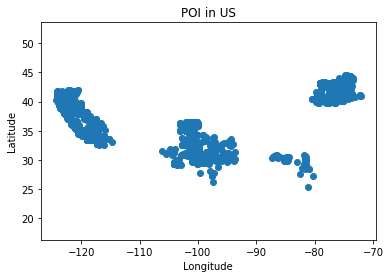

In [ ]:
import matplotlib.pyplot as plt

# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))

# Convert coordinates into numpy array
X = np.array(coords)

plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('POI in US')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [ ]:

X.shape

(3394, 2)

In [ ]:
X= pd.DataFrame(X)
X



,0,1
0,-119.573693,37.730770
1,-96.029689,31.958773
2,-103.027944,29.344923
3,-94.145186,32.740143
4,-99.233650,29.529952
...,...,...
3389,-118.658786,34.079234
3390,-73.940675,41.703961
3391,-76.491336,42.438561
3392,-77.556845,43.235748


In [ ]:
X.to_csv('query.csv', header=False, index=False)

# Turn health data and POI data into GeoDataFrame

In [ ]:

health_data_GEO = gpd.GeoDataFrame(health_data,   geometry=gpd.points_from_xy(health_data.longitude, health_data.latitude))
health_data_GEO.set_crs(epsg=4326, inplace=True)


,Geolocation,Place_TractID,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COLON_SCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,longitude,latitude,geometry
0,POINT (-118.224698433 34.0470512474),0644000-06037206032,5275,28.0,19.9,13.0,31.7,70.0,4.5,8.5,6.9,63.8,66.0,48.6,6.5,18.2,22.1,15.6,43.6,15.5,38.3,4.1,33.3,77.6,15.0,29.5,83.7,17.3,38.9,4.0,18.8,-118.224698,34.047051,POINT (-118.22470 34.04705)
1,POINT (-118.143832177 34.1633689905),0656000-06037462001,3974,23.3,16.7,16.3,27.1,63.7,3.6,9.4,4.8,62.2,65.7,52.5,6.0,19.4,25.7,17.8,47.6,11.6,31.8,3.2,27.0,80.2,15.7,32.0,85.8,15.3,40.2,3.2,18.1,-118.143832,34.163369,POINT (-118.14383 34.16337)
2,POINT (-117.883112998 33.8820402343),0628000-06059011504,5473,11.7,8.3,18.6,13.6,49.5,2.0,9.2,2.1,59.3,54.5,59.5,3.4,34.6,27.5,13.3,61.3,4.6,21.1,1.6,16.1,81.0,14.1,18.7,78.2,8.5,33.4,1.2,11.9,-117.883113,33.882040,POINT (-117.88311 33.88204)
3,POINT (-94.7523262965 32.5544549842),4843888-48183000401,3371,19.3,21.1,20.9,28.4,72.4,5.2,9.3,5.4,66.6,68.9,60.7,6.1,35.6,30.5,20.5,58.0,9.2,33.9,2.5,25.1,74.3,13.5,33.9,79.3,11.8,34.9,2.7,15.1,-94.752326,32.554455,POINT (-94.75233 32.55445)
4,POINT (-117.062840167 32.7058787421),0666000-06073003112,4574,16.6,18.4,16.1,30.3,71.4,4.4,8.9,5.3,66.0,71.1,61.2,5.5,20.5,25.5,15.8,57.1,12.9,34.3,3.1,25.5,81.8,13.7,24.8,82.9,13.1,39.1,3.3,14.5,-117.062840,32.705879,POINT (-117.06284 32.70588)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12583,POINT (-95.4452950632 29.9436778098),4835000-48201550500,982,29.5,18.0,16.2,32.5,72.5,4.0,9.5,5.0,69.6,64.8,56.1,5.3,24.5,27.1,18.1,50.6,12.4,36.3,2.9,30.4,78.1,13.5,34.3,81.7,12.3,39.3,3.0,17.7,-95.445295,29.943678,POINT (-95.44530 29.94368)
12584,POINT (-117.116515129 32.6909863024),0666000-06073003601,3250,32.6,17.3,16.3,28.4,63.0,3.3,9.9,5.8,58.9,56.4,48.7,6.6,15.5,17.4,19.7,41.5,13.6,35.3,3.8,34.5,80.4,18.6,31.5,85.0,18.1,38.8,3.6,23.2,-117.116515,32.690986,POINT (-117.11652 32.69099)
12585,POINT (-122.506146619 37.7613974595),0667000-06075035202,4322,8.5,14.9,21.7,24.0,68.0,4.6,7.8,4.0,63.2,73.6,64.5,3.9,32.6,29.8,13.1,68.7,8.0,32.3,2.2,18.1,79.2,10.4,16.1,80.0,8.7,31.5,2.0,8.4,-122.506147,37.761397,POINT (-122.50615 37.76140)
12586,POINT (-121.175262956 38.6762556489),0624638-06067008404,3275,8.8,21.9,19.3,28.5,68.4,6.8,10.1,5.7,64.8,76.8,72.5,6.4,33.3,28.4,15.2,68.3,8.6,31.5,2.8,18.7,78.8,12.7,26.9,83.0,12.3,34.6,2.9,11.0,-121.175263,38.676256,POINT (-121.17526 38.67626)


In [ ]:
X = pd.read_csv('query.csv',header = None )
X

,0,1
0,-119.573693,37.730770
1,-96.029689,31.958773
2,-103.027944,29.344923
3,-94.145186,32.740143
4,-99.233650,29.529952
...,...,...
3389,-118.658786,34.079234
3390,-73.940675,41.703961
3391,-76.491336,42.438561
3392,-77.556845,43.235748


In [ ]:
POI_GEO = gpd.GeoDataFrame(X,   geometry=gpd.points_from_xy(X[0], X[1]))
POI_GEO.set_crs(epsg=4326, inplace=True)
POI_GEO

,0,1,geometry
0,-119.573693,37.730770,POINT (-119.57369 37.73077)
1,-96.029689,31.958773,POINT (-96.02969 31.95877)
2,-103.027944,29.344923,POINT (-103.02794 29.34492)
3,-94.145186,32.740143,POINT (-94.14519 32.74014)
4,-99.233650,29.529952,POINT (-99.23365 29.52995)
...,...,...,...
3389,-118.658786,34.079234,POINT (-118.65879 34.07923)
3390,-73.940675,41.703961,POINT (-73.94067 41.70396)
3391,-76.491336,42.438561,POINT (-76.49134 42.43856)
3392,-77.556845,43.235748,POINT (-77.55684 43.23575)


# Space join

In [ ]:
health_join = pd.merge(area_boundary, health_data, left_on='plctract10', right_on = 'Place_TractID')
health_join_GEO = gpd.GeoDataFrame(health_join, crs="EPSG:4326", geometry='geometry_x')

In [ ]:
POI_join = gpd.sjoin(POI_GEO, health_join_GEO.to_crs(epsg=4326), how='right',op='within')
POI_join.head()

,index_left,0,1,place2010,tract2010,ST,PlaceName,plctract10,PlcTrPop10,geometry_x,area,Geolocation,Place_TractID,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COLON_SCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,longitude,latitude,geometry_y
0,NaN,NaN,NaN,0600562,06001427100,06,Alameda,0600562-06001427100,3646,"POLYGON ((-122.22538 37.75586, -122.22539 37.7...",1.645791e+06,POINT (-122.231170131 37.7645625166),0600562-06001427100,3646,5.9,21.9,18.3,27.3,74.4,7.7,8.3,5.4,69.7,85.2,75.3,4.7,39.3,36.9,10.9,76.4,8.5,32.4,2.6,14.7,79.4,9.1,19.2,84.3,9.6,31.1,2.5,6.9,-122.231170,37.764563,POINT (-122.23117 37.76456)
1,NaN,NaN,NaN,0600562,06001427200,06,Alameda,0600562-06001427200,4107,"MULTIPOLYGON (((-122.25125 37.77821, -122.2511...",2.132769e+06,POINT (-122.247776936 37.775929832),0600562-06001427200,4107,8.5,18.0,17.7,25.3,71.0,5.2,8.5,4.5,66.1,77.2,67.9,4.5,33.4,32.8,13.6,67.6,9.3,31.2,2.5,18.1,78.9,10.8,19.7,81.1,10.1,35.6,2.3,8.7,-122.247777,37.775930,POINT (-122.24778 37.77593)
2,NaN,NaN,NaN,0600562,06001427300,06,Alameda,0600562-06001427300,4896,"POLYGON ((-122.25164 37.77820, -122.25165 37.7...",3.131895e+06,POINT (-122.266079332 37.7811916268),0600562-06001427300,4896,8.3,21.4,15.8,29.6,75.0,6.5,8.7,5.8,68.7,79.5,70.0,5.3,34.4,33.5,13.0,68.1,10.6,34.5,2.8,18.9,78.1,10.3,19.5,80.6,10.9,34.4,2.8,9.6,-122.266079,37.781192,POINT (-122.26608 37.78119)
3,NaN,NaN,NaN,0600562,06001427600,06,Alameda,0600562-06001427600,4722,"POLYGON ((-122.27664 37.77969, -122.27665 37.7...",9.345803e+05,POINT (-122.283597907 37.7778322183),0600562-06001427600,4722,12.3,17.5,14.8,27.0,69.6,4.2,9.6,4.6,64.6,68.3,60.0,5.2,27.1,26.9,16.8,55.5,10.7,31.5,2.8,23.4,78.0,13.5,21.8,79.2,12.1,39.3,2.8,14.8,-122.283598,37.777832,POINT (-122.28360 37.77783)
4,NaN,NaN,NaN,0600562,06001427700,06,Alameda,0600562-06001427700,4866,"MULTIPOLYGON (((-122.28077 37.76636, -122.2807...",1.623464e+06,POINT (-122.285136575 37.7691701721),0600562-06001427700,4866,7.3,17.9,18.3,25.0,71.3,5.6,8.3,4.4,66.9,79.4,72.1,4.2,36.5,35.8,12.2,71.7,8.4,30.8,2.3,15.9,79.0,9.8,19.0,82.1,9.2,34.1,2.1,7.5,-122.285137,37.769170,POINT (-122.28514 37.76917)


In [ ]:
POI_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12681 entries, 0 to 12587
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   index_left              201 non-null    float64 
 1   0                       201 non-null    float64 
 2   1                       201 non-null    float64 
 3   place2010               12681 non-null  object  
 4   tract2010               12681 non-null  object  
 5   ST                      12681 non-null  object  
 6   PlaceName               12681 non-null  object  
 7   plctract10              12681 non-null  object  
 8   PlcTrPop10              12681 non-null  int64   
 9   geometry_x              12681 non-null  geometry
 10  area                    12681 non-null  float64 
 11  Geolocation             12681 non-null  object  
 12  Place_TractID           12681 non-null  object  
 13  Population2010          12681 non-null  int64   
 14  ACCESS2_CrudePrev     

In [ ]:
res = POI_join[[0, 1,'Place_TractID','area']]
res

,0,1,Place_TractID,area
0,NaN,NaN,0600562-06001427100,1.645791e+06
1,NaN,NaN,0600562-06001427200,2.132769e+06
2,NaN,NaN,0600562-06001427300,3.131895e+06
3,NaN,NaN,0600562-06001427600,9.345803e+05
4,NaN,NaN,0600562-06001427700,1.623464e+06
...,...,...,...,...
12583,NaN,NaN,4879000-48485013000,4.834685e+06
12584,NaN,NaN,4879000-48485013100,4.827368e+07
12585,NaN,NaN,4879000-48485013200,1.323610e+07
12586,NaN,NaN,4879000-48485013300,8.107497e+05


In [ ]:
res.nunique()

0                  201
1                  201
Place_TractID    12588
area             12588
dtype: int64

# Get Count for Each GEOID


In [ ]:
count = res.groupby('Place_TractID').count()
count


,0,1,area
Place_TractID,,,
0600562-06001427100,0,0,1
0600562-06001427200,0,0,1
0600562-06001427300,0,0,1
0600562-06001427600,0,0,1
0600562-06001427700,0,0,1
...,...,...,...
4879000-48485013000,0,0,1
4879000-48485013100,0,0,1
4879000-48485013200,0,0,1


In [ ]:
res2 = pd.merge(res, count, on = ['Place_TractID'], how = 'inner')
res2

,0_x,1_x,Place_TractID,area_x,0_y,1_y,area_y
0,NaN,NaN,0600562-06001427100,1.645791e+06,0,0,1
1,NaN,NaN,0600562-06001427200,2.132769e+06,0,0,1
2,NaN,NaN,0600562-06001427300,3.131895e+06,0,0,1
3,NaN,NaN,0600562-06001427600,9.345803e+05,0,0,1
4,NaN,NaN,0600562-06001427700,1.623464e+06,0,0,1
...,...,...,...,...,...,...,...
12676,NaN,NaN,4879000-48485013000,4.834685e+06,0,0,1
12677,NaN,NaN,4879000-48485013100,4.827368e+07,0,0,1
12678,NaN,NaN,4879000-48485013200,1.323610e+07,0,0,1
12679,NaN,NaN,4879000-48485013300,8.107497e+05,0,0,1


In [ ]:

run_count = res2.drop_duplicates(keep = 'first', subset = 'Place_TractID')
run_count = run_count.loc[:,['0_x','1_x','Place_TractID','area_x','0_y']]
run_count.reset_index(drop=True)


,0_x,1_x,Place_TractID,area_x,0_y
0,NaN,NaN,0600562-06001427100,1.645791e+06,0
1,NaN,NaN,0600562-06001427200,2.132769e+06,0
2,NaN,NaN,0600562-06001427300,3.131895e+06,0
3,NaN,NaN,0600562-06001427600,9.345803e+05,0
4,NaN,NaN,0600562-06001427700,1.623464e+06,0
...,...,...,...,...,...
12583,NaN,NaN,4879000-48485013000,4.834685e+06,0
12584,NaN,NaN,4879000-48485013100,4.827368e+07,0
12585,NaN,NaN,4879000-48485013200,1.323610e+07,0
12586,NaN,NaN,4879000-48485013300,8.107497e+05,0


# Get points distance standard deviation

In [ ]:
mean = res2.groupby('Place_TractID').mean()
mean

,0_x,1_x,area_x,0_y,1_y,area_y
Place_TractID,,,,,,
0600562-06001427100,NaN,NaN,1.645791e+06,0,0,1
0600562-06001427200,NaN,NaN,2.132769e+06,0,0,1
0600562-06001427300,NaN,NaN,3.131895e+06,0,0,1
0600562-06001427600,NaN,NaN,9.345803e+05,0,0,1
0600562-06001427700,NaN,NaN,1.623464e+06,0,0,1
...,...,...,...,...,...,...
4879000-48485013000,NaN,NaN,4.834685e+06,0,0,1
4879000-48485013100,NaN,NaN,4.827368e+07,0,0,1
4879000-48485013200,NaN,NaN,1.323610e+07,0,0,1


In [ ]:

run_std =  pd.merge(res2, mean, on = ['Place_TractID'])
run_std



,0_x_x,1_x_x,Place_TractID,area_x_x,0_y_x,1_y_x,area_y_x,0_x_y,1_x_y,area_x_y,0_y_y,1_y_y,area_y_y
0,NaN,NaN,0600562-06001427100,1.645791e+06,0,0,1,NaN,NaN,1.645791e+06,0,0,1
1,NaN,NaN,0600562-06001427200,2.132769e+06,0,0,1,NaN,NaN,2.132769e+06,0,0,1
2,NaN,NaN,0600562-06001427300,3.131895e+06,0,0,1,NaN,NaN,3.131895e+06,0,0,1
3,NaN,NaN,0600562-06001427600,9.345803e+05,0,0,1,NaN,NaN,9.345803e+05,0,0,1
4,NaN,NaN,0600562-06001427700,1.623464e+06,0,0,1,NaN,NaN,1.623464e+06,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12676,NaN,NaN,4879000-48485013000,4.834685e+06,0,0,1,NaN,NaN,4.834685e+06,0,0,1
12677,NaN,NaN,4879000-48485013100,4.827368e+07,0,0,1,NaN,NaN,4.827368e+07,0,0,1
12678,NaN,NaN,4879000-48485013200,1.323610e+07,0,0,1,NaN,NaN,1.323610e+07,0,0,1
12679,NaN,NaN,4879000-48485013300,8.107497e+05,0,0,1,NaN,NaN,8.107497e+05,0,0,1


In [ ]:
run_std['(x-c)^2 + (y-c)^2'] = (run_std['0_x_x'] - run_std['0_x_y'])**2 + (run_std['1_x_x'] - run_std['1_x_y'])**2
run_std = run_std.loc[:,['(x-c)^2 + (y-c)^2', 'Place_TractID']].groupby('Place_TractID').sum()
run = pd.merge(run_count, run_std, on = ['Place_TractID'], how = 'right')
run

,0_x,1_x,Place_TractID,area_x,0_y,(x-c)^2 + (y-c)^2
0,NaN,NaN,0600562-06001427100,1.645791e+06,0,0.0
1,NaN,NaN,0600562-06001427200,2.132769e+06,0,0.0
2,NaN,NaN,0600562-06001427300,3.131895e+06,0,0.0
3,NaN,NaN,0600562-06001427600,9.345803e+05,0,0.0
4,NaN,NaN,0600562-06001427700,1.623464e+06,0,0.0
...,...,...,...,...,...,...
12583,NaN,NaN,4879000-48485013000,4.834685e+06,0,0.0
12584,NaN,NaN,4879000-48485013100,4.827368e+07,0,0.0
12585,NaN,NaN,4879000-48485013200,1.323610e+07,0,0.0
12586,NaN,NaN,4879000-48485013300,8.107497e+05,0,0.0


In [ ]:
run['STD'] = np.nan

for i in range (0,run.shape[0]):
  run.at[i, 'STD'] = math.sqrt(run.at[i, '(x-c)^2 + (y-c)^2'])/run.at[i, '0_y']

run

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


,0_x,1_x,Place_TractID,area_x,0_y,(x-c)^2 + (y-c)^2,STD
0,NaN,NaN,0600562-06001427100,1.645791e+06,0,0.0,NaN
1,NaN,NaN,0600562-06001427200,2.132769e+06,0,0.0,NaN
2,NaN,NaN,0600562-06001427300,3.131895e+06,0,0.0,NaN
3,NaN,NaN,0600562-06001427600,9.345803e+05,0,0.0,NaN
4,NaN,NaN,0600562-06001427700,1.623464e+06,0,0.0,NaN
...,...,...,...,...,...,...,...
12583,NaN,NaN,4879000-48485013000,4.834685e+06,0,0.0,NaN
12584,NaN,NaN,4879000-48485013100,4.827368e+07,0,0.0,NaN
12585,NaN,NaN,4879000-48485013200,1.323610e+07,0,0.0,NaN
12586,NaN,NaN,4879000-48485013300,8.107497e+05,0,0.0,NaN


In [ ]:
s = pd.merge(run, health_join, on = ['Place_TractID'], how = 'left')
s

,0_x,1_x,Place_TractID,area_x,0_y,(x-c)^2 + (y-c)^2,STD,place2010,tract2010,ST,PlaceName,plctract10,PlcTrPop10,geometry_x,area,Geolocation,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COLON_SCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,longitude,latitude,geometry_y
0,NaN,NaN,0600562-06001427100,1.645791e+06,0,0.0,NaN,0600562,06001427100,06,Alameda,0600562-06001427100,3646,"POLYGON ((-13606067.562 4544993.549, -13606068...",1.645791e+06,POINT (-122.231170131 37.7645625166),3646,5.9,21.9,18.3,27.3,74.4,7.7,8.3,5.4,69.7,85.2,75.3,4.7,39.3,36.9,10.9,76.4,8.5,32.4,2.6,14.7,79.4,9.1,19.2,84.3,9.6,31.1,2.5,6.9,-122.231170,37.764563,POINT (-122.23117 37.76456)
1,NaN,NaN,0600562-06001427200,2.132769e+06,0,0.0,NaN,0600562,06001427200,06,Alameda,0600562-06001427200,4107,"MULTIPOLYGON (((-13608946.922 4548141.098, -13...",2.132769e+06,POINT (-122.247776936 37.775929832),4107,8.5,18.0,17.7,25.3,71.0,5.2,8.5,4.5,66.1,77.2,67.9,4.5,33.4,32.8,13.6,67.6,9.3,31.2,2.5,18.1,78.9,10.8,19.7,81.1,10.1,35.6,2.3,8.7,-122.247777,37.775930,POINT (-122.24778 37.77593)
2,NaN,NaN,0600562-06001427300,3.131895e+06,0,0.0,NaN,0600562,06001427300,06,Alameda,0600562-06001427300,4896,"POLYGON ((-13608990.630 4548140.130, -13608991...",3.131895e+06,POINT (-122.266079332 37.7811916268),4896,8.3,21.4,15.8,29.6,75.0,6.5,8.7,5.8,68.7,79.5,70.0,5.3,34.4,33.5,13.0,68.1,10.6,34.5,2.8,18.9,78.1,10.3,19.5,80.6,10.9,34.4,2.8,9.6,-122.266079,37.781192,POINT (-122.26608 37.78119)
3,NaN,NaN,0600562-06001427600,9.345803e+05,0,0.0,NaN,0600562,06001427600,06,Alameda,0600562-06001427600,4722,"POLYGON ((-13611773.433 4548349.830, -13611773...",9.345803e+05,POINT (-122.283597907 37.7778322183),4722,12.3,17.5,14.8,27.0,69.6,4.2,9.6,4.6,64.6,68.3,60.0,5.2,27.1,26.9,16.8,55.5,10.7,31.5,2.8,23.4,78.0,13.5,21.8,79.2,12.1,39.3,2.8,14.8,-122.283598,37.777832,POINT (-122.28360 37.77783)
4,NaN,NaN,0600562-06001427700,1.623464e+06,0,0.0,NaN,0600562,06001427700,06,Alameda,0600562-06001427700,4866,"MULTIPOLYGON (((-13612232.849 4546472.684, -13...",1.623464e+06,POINT (-122.285136575 37.7691701721),4866,7.3,17.9,18.3,25.0,71.3,5.6,8.3,4.4,66.9,79.4,72.1,4.2,36.5,35.8,12.2,71.7,8.4,30.8,2.3,15.9,79.0,9.8,19.0,82.1,9.2,34.1,2.1,7.5,-122.285137,37.769170,POINT (-122.28514 37.76917)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12583,NaN,NaN,4879000-48485013000,4.834685e+06,0,0.0,NaN,4879000,48485013000,48,Wichita Falls,4879000-48485013000,2393,"POLYGON ((-10967099.834 4020452.050, -10967057...",4.834685e+06,POINT (-98.5343111625 33.9346141913),2393,25.4,28.2,14.7,38.5,77.9,5.9,10.3,8.2,70.7,68.8,54.3,9.4,25.7,27.3,26.8,48.7,15.7,43.1,3.7,37.2,75.2,16.3,35.9,79.7,17.2,41.3,4.4,20.7,-98.534311,33.934614,POINT (-98.53431 33.93461)
12584,NaN,NaN,4879000-48485013100,4.827368e+07,0,0.0,NaN,4879000,48485013100,48,Wichita Falls,4879000-48485013100,7551,"POLYGON ((-10967099.834 4020452.050, -10967137...",4.827368e+07,POINT (-98.5648449683 33.9604333081),7551,28.5,19.2,21.2,32.4,69.3,4.0,8.5,5.4,67.5,67.7,56.5,6.1,28.0,32.1,27.2,51.3,11.7,35.7,2.5,31.2,74.6,13.6,35.5,78.7,13.0,43.3,2.8,16.2,-98.564845,33.960433,POINT (-98.56484 33.96043)
12585,NaN,NaN,4879000-48485013200,1.323610e+07,0,0.0,NaN,4879000,48485013200,48,Wichita Falls,4879000-48485013200,6406,"POLYGON ((-10967120.985 4027329.638, -10967125...",1.323610e+07,POINT (-98.5240307888 33.9670717896),6406,17.5,23.6,16.9,33.3,77.1,5.5,9.3,5.9,72.1,74.2,63.5,6.2,29.5,32.1,20.2,60.6,12.5,37.0,2.9,27.3,79.0,12.

In [ ]:
run = run[['STD','0_y']]
run

,STD,0_y
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
...,...,...
12583,NaN,0
12584,NaN,0
12585,NaN,0
12586,NaN,0


In [ ]:
US_heal = s[['area','Population2010','ACCESS2_CrudePrev','ARTHRITIS_CrudePrev','BINGE_CrudePrev','BPHIGH_CrudePrev','BPMED_CrudePrev','CANCER_CrudePrev','CASTHMA_CrudePrev', 'CHD_CrudePrev', 'CHECKUP_CrudePrev','CHOLSCREEN_CrudePrev','COLON_SCREEN_CrudePrev','COPD_CrudePrev','COREM_CrudePrev','COREW_CrudePrev','CSMOKING_CrudePrev','DENTAL_CrudePrev','DIABETES_CrudePrev','HIGHCHOL_CrudePrev', 'KIDNEY_CrudePrev', 'LPA_CrudePrev', 'MAMMOUSE_CrudePrev', 'MHLTH_CrudePrev', 'OBESITY_CrudePrev','PAPTEST_CrudePrev','PHLTH_CrudePrev','SLEEP_CrudePrev','STROKE_CrudePrev','TEETHLOST_CrudePrev']]

In [ ]:
US_heal

,area,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COLON_SCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev
0,1.645791e+06,3646,5.9,21.9,18.3,27.3,74.4,7.7,8.3,5.4,69.7,85.2,75.3,4.7,39.3,36.9,10.9,76.4,8.5,32.4,2.6,14.7,79.4,9.1,19.2,84.3,9.6,31.1,2.5,6.9
1,2.132769e+06,4107,8.5,18.0,17.7,25.3,71.0,5.2,8.5,4.5,66.1,77.2,67.9,4.5,33.4,32.8,13.6,67.6,9.3,31.2,2.5,18.1,78.9,10.8,19.7,81.1,10.1,35.6,2.3,8.7
2,3.131895e+06,4896,8.3,21.4,15.8,29.6,75.0,6.5,8.7,5.8,68.7,79.5,70.0,5.3,34.4,33.5,13.0,68.1,10.6,34.5,2.8,18.9,78.1,10.3,19.5,80.6,10.9,34.4,2.8,9.6
3,9.345803e+05,4722,12.3,17.5,14.8,27.0,69.6,4.2,9.6,4.6,64.6,68.3,60.0,5.2,27.1,26.9,16.8,55.5,10.7,31.5,2.8,23.4,78.0,13.5,21.8,79.2,12.1,39.3,2.8,14.8
4,1.623464e+06,4866,7.3,17.9,18.3,25.0,71.3,5.6,8.3,4.4,66.9,79.4,72.1,4.2,36.5,35.8,12.2,71.7,8.4,30.8,2.3,15.9,79.0,9.8,19.0,82.1,9.2,34.1,2.1,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12583,4.834685e+06,2393,25.4,28.2,14.7,38.5,77.9,5.9,10.3,8.2,70.7,68.8,54.3,9.4,25.7,27.3,26.8,48.7,15.7,43.1,3.7,37.2,75.2,16.3,35.9,79.7,17.2,41.3,4.4,20.7
12584,4.827368e+07,7551,28.5,19.2,21.2,32.4,69.3,4.0,8.5,5.4,67.5,67.7,56.5,6.1,28.0,32.1,27.2,51.3,11.7,35.7,2.5,31.2,74.6,13.6,35.5,78.7,13.0,43.3,2.8,16.2
12585,1.323610e+07,6406,17.5,23.6,16.9,33.3,77.1,5.5,9.3,5.9,72.1,74.2,63.5,6.2,29.5,32.1,20.2,60.6,12.5,37.0,2.9,27.3,79.0,12.8,32.2,82.3,12.2,39.3,3.2,12.4
12586,8.107497e+05,1375,17.0,8.7,26.1,14.6,43.2,2.0,8.9,1.3,63.3,64.0,55.4,2.8,31.3,NaN,21.7,64.6,3.1,19.1,1.2,18.6,77.5,13.4,27.0,83.4,7.0,40.2,0.8,7.3


In [ ]:
US_heal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12588 entries, 0 to 12587
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   area                    12588 non-null  float64
 1   Population2010          12588 non-null  int64  
 2   ACCESS2_CrudePrev       12587 non-null  float64
 3   ARTHRITIS_CrudePrev     12588 non-null  float64
 4   BINGE_CrudePrev         12588 non-null  float64
 5   BPHIGH_CrudePrev        12588 non-null  float64
 6   BPMED_CrudePrev         12588 non-null  float64
 7   CANCER_CrudePrev        12588 non-null  float64
 8   CASTHMA_CrudePrev       12588 non-null  float64
 9   CHD_CrudePrev           12588 non-null  float64
 10  CHECKUP_CrudePrev       12588 non-null  float64
 11  CHOLSCREEN_CrudePrev    12588 non-null  float64
 12  COLON_SCREEN_CrudePrev  12580 non-null  float64
 13  COPD_CrudePrev          12588 non-null  float64
 14  COREM_CrudePrev         12539 non-null

# Export data

In [ ]:
os.chdir("/content/gdrive/My Drive/big data and city 3/")

In [ ]:
#run.to_csv('natural_cliff.csv', header=False, index=False)
US_heal.to_csv('US_heal.csv', header=False, index=False)